In [20]:
import pandas as pd
import numpy as np
from catboost import CatBoostClassifier, Pool, MetricVisualizer
import matplotlib.pyplot as plt

In [2]:
train = pd.read_csv('data/train.csv')
train

,label,os,is_mobile,country,pageviews,visits,hits,bounces,campaign,traffic_source,medium,device_category,engagement_type
0,0,iOS,True,United States,1,1,1,1,(not set),(direct),(none),mobile,Not Socially Engaged
1,0,Android,True,India,1,1,1,1,(not set),(direct),(none),mobile,Not Socially Engaged
2,0,Linux,False,United States,1,1,1,1,(not set),(direct),(none),desktop,Not Socially Engaged
3,0,Android,True,United States,1,1,1,1,(not set),(direct),(none),mobile,Not Socially Engaged
4,0,iOS,True,United States,1,1,1,1,(not set),(direct),(none),tablet,Not Socially Engaged
...,...,...,...,...,...,...,...,...,...,...,...,...,...
653470,0,Android,True,United States,2,1,2,0,(not set),(direct),(none),mobile,Not Socially Engaged
653471,0,Windows,False,United States,2,1,2,0,(not set),(direct),(none),desktop,Not Socially Engaged
653472,0,Macintosh,False,United States,2,1,2,0,(not set),(direct),(none),desktop,Not Socially Engaged
653473,0,Windows,False,United States,2,1,2,0,(not set),(direct),(none),desktop,Not Socially Engaged


In [3]:
test = pd.read_csv('data/test.csv')
test

,label,os,is_mobile,country,pageviews,visits,hits,bounces,campaign,traffic_source,medium,device_category,engagement_type
0,0,Windows,False,Brazil,2,1,2,0,(not set),google,organic,desktop,Not Socially Engaged
1,0,Windows,False,United States,2,1,2,0,(not set),google,organic,desktop,Not Socially Engaged
2,0,iOS,True,Netherlands,2,1,2,0,(not set),google,organic,tablet,Not Socially Engaged
3,0,Macintosh,False,Russia,2,1,2,0,(not set),google,organic,desktop,Not Socially Engaged
4,0,Windows,False,United States,3,1,3,0,(not set),google,organic,desktop,Not Socially Engaged
...,...,...,...,...,...,...,...,...,...,...,...,...,...
175805,0,Windows,False,India,2,1,2,0,(not set),youtube.com,referral,desktop,Not Socially Engaged
175806,0,Linux,False,United States,2,1,2,0,(not set),youtube.com,referral,desktop,Not Socially Engaged
175807,0,Windows,False,United States,2,1,2,0,(not set),youtube.com,referral,desktop,Not Socially Engaged
175808,0,Windows,True,United States,2,1,2,0,(not set),youtube.com,referral,mobile,Not Socially Engaged


In [7]:
test.nunique()

label                2
os                  16
is_mobile            2
country            201
pageviews          144
visits               1
hits               179
bounces              2
campaign             7
traffic_source     163
medium               7
device_category      3
engagement_type      1
dtype: int64

In [8]:
test.dtypes

label               int64
os                 object
is_mobile            bool
country            object
pageviews           int64
visits              int64
hits                int64
bounces             int64
campaign           object
traffic_source     object
medium             object
device_category    object
engagement_type    object
dtype: object

In [43]:
c_features = ['os','country','campaign','traffic_source','medium','device_category','engagement_type']

train_X = train.drop('label', axis=1)
train_data = Pool(train_X,
                  label=train.label,
                  cat_features=c_features,
                  feature_names=list(train_X.columns),
                  has_header=True)

test_X = test.drop('label', axis=1)
test_data = Pool(test_X,
                  label=test.label,
                  cat_features=c_features,
                  feature_names=list(test_X.columns),
                  has_header=True)

In [44]:
model = CatBoostClassifier(iterations=100,
                           depth=4,
                           learning_rate=.1,
                           loss_function='Logloss',
                           verbose=False)

model.fit(train_data,
          eval_set=test_data)

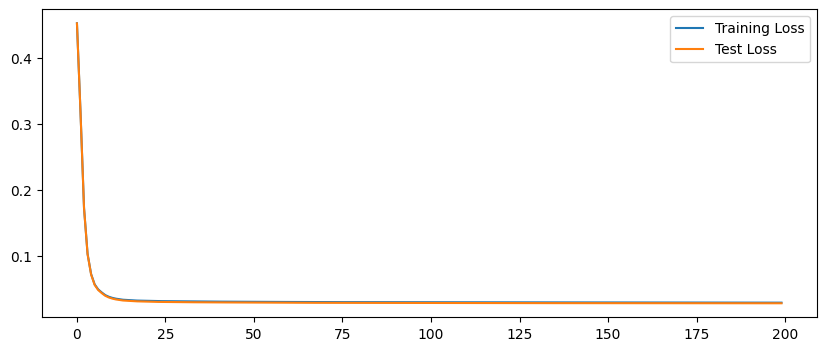

In [45]:
plt.figure(figsize=(10,4))
x = range(len(model.evals_result_['learn']['Logloss']))
plt.plot(x,
         model.evals_result_['learn']['Logloss'],
         label='Training Loss')
plt.plot(x,
         model.evals_result_['validation']['Logloss'],
         label='Test Loss')
plt.legend()

In [9]:
??CatBoostClassifier

Init signature:
CatBoostClassifier(
    iterations=None,
    learning_rate=None,
    depth=None,
    l2_leaf_reg=None,
    model_size_reg=None,
    rsm=None,
    loss_function=None,
    border_count=None,
    feature_border_type=None,
    per_float_feature_quantization=None,
    input_borders=None,
    output_borders=None,
    fold_permutation_block=None,
    od_pval=None,
    od_wait=None,
    od_type=None,
    nan_mode=None,
    counter_calc_method=None,
    leaf_estimation_iterations=None,
    leaf_estimation_method=None,
    thread_count=None,
    random_seed=None,
    use_best_model=None,
    best_model_min_trees=None,
    verbose=None,
    silent=None,
    logging_level=None,
    metric_period=None,
    ctr_leaf_count_limit=None,
    store_all_simple_ctr=None,
    max_ctr_complexity=None,
    has_time=None,
    allow_const_label=None,
    target_border=None,
    classes_count=None,
    class_weights=None,
    auto_class_weights=None,
    class_names=None,
    one_hot_max_size=Non

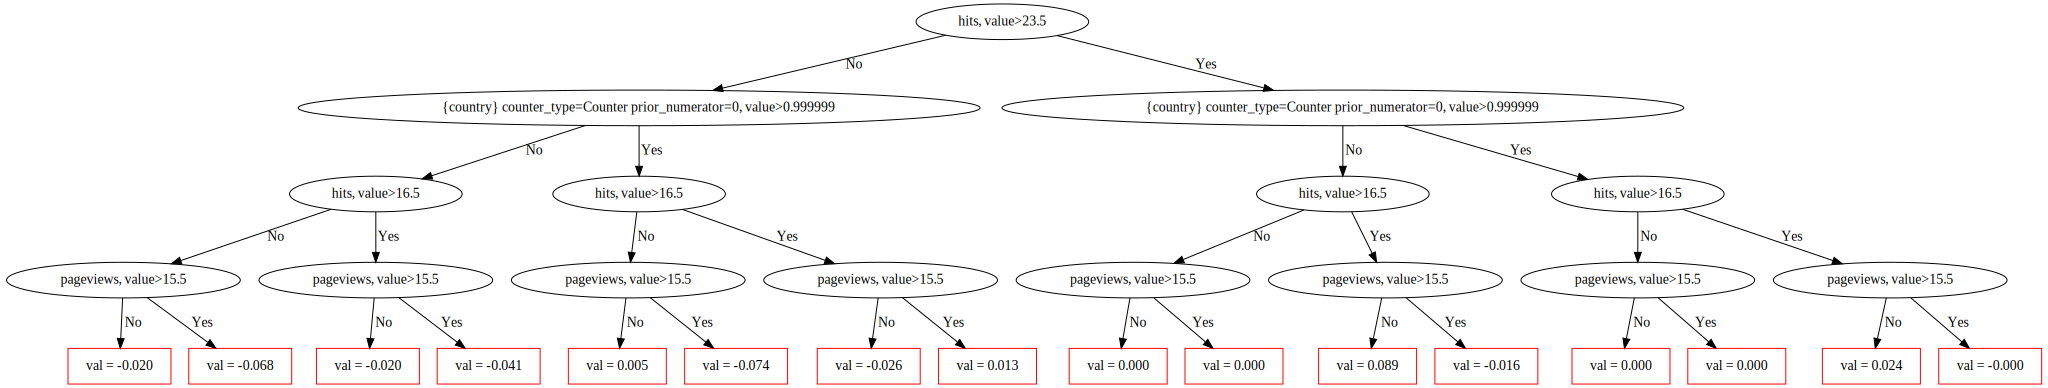

In [51]:
model.plot_tree(pool=test_data,tree_idx=190)

In [54]:
model.get_feature_importance()

array([9.91832724e-01, 2.20676865e+00, 3.53036076e+01, 7.91179385e+00,
       0.00000000e+00, 4.73082912e+01, 3.12579220e+00, 1.18475092e-02,
       2.68479123e-01, 2.14746596e+00, 7.24121193e-01, 0.00000000e+00])

In [ ]:

# make the prediction using the resulting model
preds_class = model.predict(test_data)
preds_proba = model.predict_proba(test_data)
print("class = ", preds_class)
print("proba = ", preds_proba)